In [87]:
import pandas as pd
import numpy as np

# 데이터 불러오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

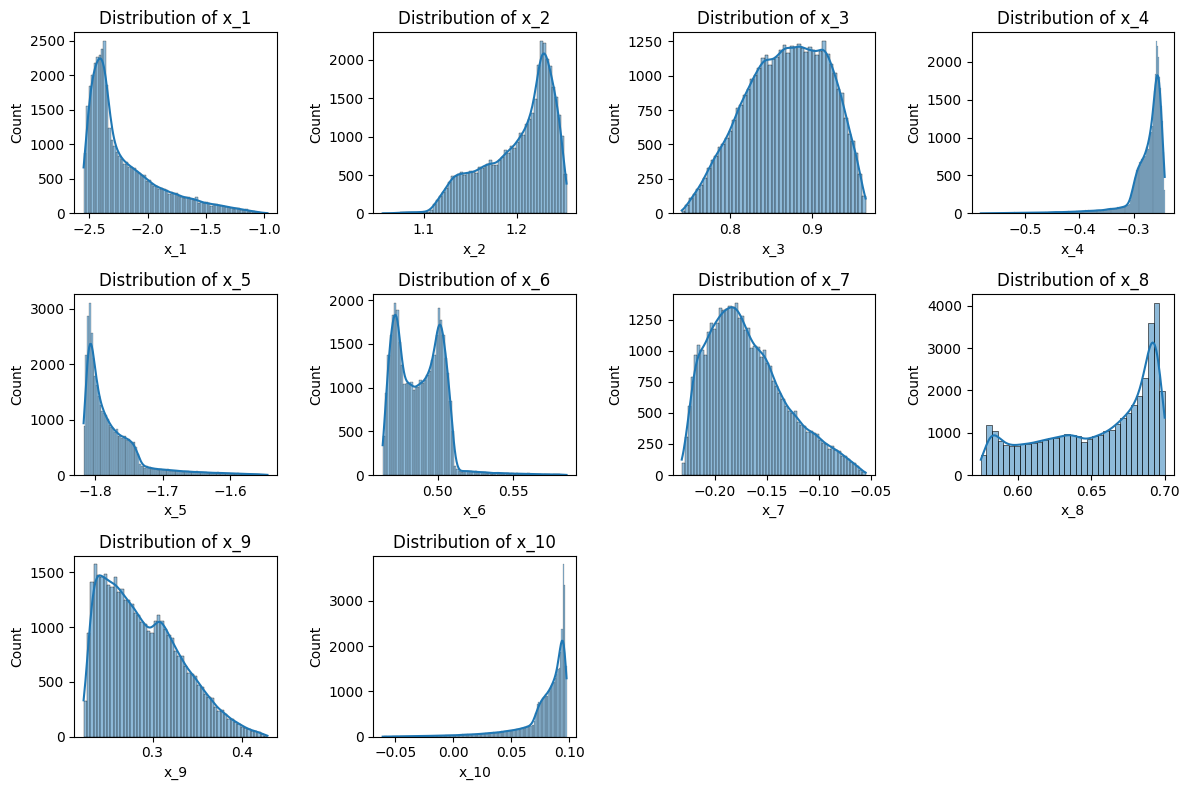

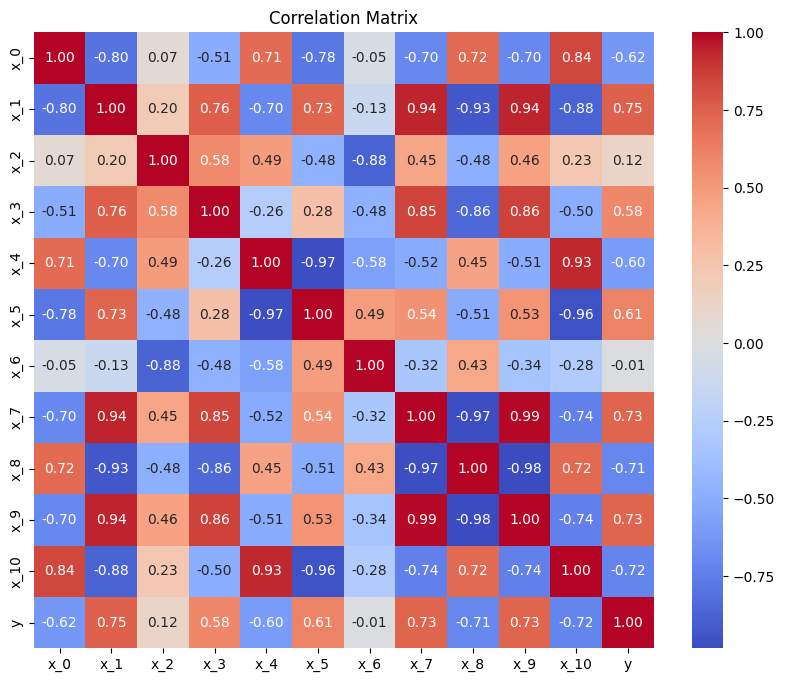

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train_df=train_df.drop(columns=['ID'])

# 4. 변수 간 상관관계 분석
correlation_matrix = train_df.corr()

# 5. 주요 변수의 분포 시각화
plt.figure(figsize=(12, 8))
for i, column in enumerate(train_df.columns[1:-1], 1):
    plt.subplot(3, 4, i)
    sns.histplot(train_df[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

# y와 각 변수 간의 상관관계 히트맵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()


In [76]:
# # 타겟 변수 'y'의 9분위수 계산
# quantiles = np.percentile(train_df['y'], np.linspace(0, 100, 11))

# # 'y'를 9개의 구간으로 나누고 1부터 9까지의 값으로 변환
# train_df['y_binned'] = pd.cut(
#     train_df['y'], 
#     bins=quantiles, 
#     labels=np.arange(0, 10), 
#     include_lowest=True
# )

train_df.drop(columns=['x_6'])
test_df.drop(columns=['x_6'])

# # 'y' 컬럼 삭제
# train_df.drop(columns='y', inplace=True)

# # 'y_binned' 컬럼의 이름을 'y'로 변경
# train_df.rename(columns={'y_binned': 'y'}, inplace=True)

# 결과 확인
train_df

,ID,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,y
0,TRAIN_00000,1.006187,-1.962566,1.247535,0.926500,-0.265766,-1.789301,0.470004,-0.139467,0.623996,0.320359,0.078612,83.424500
1,TRAIN_00001,1.024647,-2.472625,1.144386,0.846499,-0.287336,-1.756679,0.503860,-0.219545,0.697607,0.238306,0.081778,79.374109
2,TRAIN_00002,1.062444,-2.451003,1.186546,0.873599,-0.257828,-1.802735,0.498045,-0.194247,0.684134,0.259392,0.095003,82.181616
3,TRAIN_00003,1.089189,-2.458470,1.184531,0.810867,-0.276517,-1.787739,0.503359,-0.201923,0.686394,0.245736,0.091737,83.006586
4,TRAIN_00004,1.023323,-2.133468,1.242266,0.939837,-0.264515,-1.792044,0.470478,-0.142896,0.623778,0.314610,0.078987,83.051434
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40113,TRAIN_40113,1.071602,-2.162285,1.243174,0.923911,-0.259240,-1.794923,0.474365,-0.157383,0.630043,0.308291,0.083303,83.744586
40114,TRAIN_40114,1.104710,-2.280343,1.226507,0.902117,-0.250661,-1.816559,0.479049,-0.174707,0.663563,0.281190,0.094247,83.401941
40115,TRAIN_40115,1.084876,-2.143004,1.244276,0.891797,-0.248833,-1.807747,0.478165,-0.168244,0.650180,0.293320,0.089925,84.745801
40116,TRAIN_40116,0.994186,-1.562092,1.227734,0.908147,-0.313856,-1.718209,0.477257,-0.109262,0.589458,0.353898,0.042610,86.192975


# 데이터정규화

In [81]:
#y와 상관관계 높은 변수들 정규화
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization (표준화)
scaler = StandardScaler()
train_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']] = scaler.fit_transform(train_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']])
test_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']] = scaler.transform(test_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']])

# # or Normalization (정규화)
# scaler = MinMaxScaler()
# train_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']] = scaler.fit_transform(train_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']])
# test_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']] = scaler.transform(test_df[['x_1', 'x_7', 'x_9', 'x_10', 'x_8', 'x_0']])

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, classification_report

# 입력 변수(X)와 타겟 변수(y) 분리
X = train_df.drop(columns=['ID', 'y'])
y = train_df['y']

# 학습용 데이터와 검증용 데이터로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# from sklearn.ensemble import AdaBoostRegressor
# from sklearn.tree import DecisionTreeRegressor
# estimator = DecisionTreeRegressor(max_depth=3, random_state=42)
# model = AdaBoostRegressor(estimator=estimator, n_estimators=50, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
#model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model = GradientBoostingRegressor(random_state=42)

# from sklearn.svm import SVR
# model = SVR(kernel='rbf', C=1.0, epsilon=0.1)

# from xgboost import XGBRegressor
# model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val)

# 회귀 모델 평가
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 2.5807120400585974
Mean Absolute Error (MAE): 1.2074903815946618
R-squared (R2): 0.6394014250621161


In [4]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report
# from sklearn.ensemble import RandomForestClassifier

# # 입력 변수(X)와 타겟 변수(y) 분리
# X = train_df.drop(columns=['ID', 'y'])
# y = train_df['y']

# # 학습용 데이터와 검증용 데이터로 분리
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # 랜덤 포레스트 모델 초기화
# model = RandomForestClassifier(random_state=42)

# # 그리드 서치를 위한 파라미터 그리드 설정
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'bootstrap': [True, False]
# }

# # 그리드 서치 설정
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
#                            cv=5, n_jobs=-1, verbose=2)

# # 학습용 데이터로 그리드 서치 수행
# grid_search.fit(X_train, y_train)

# # 최적의 파라미터 출력
# print("Best parameters found: ", grid_search.best_params_)

# # 최적의 모델로 검증 데이터 예측
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_val)

# # 모델 평가
# accuracy = accuracy_score(y_val, y_pred)
# print(f"Accuracy: {accuracy}")

# # 추가적인 평가 지표 출력
# print("Classification Report:")
# print(classification_report(y_val, y_pred))


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.4s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

In [89]:
def custom_recall_score(y_true, y_pred, true_percentile=95, pred_percentile=90):
    # 상위 퍼센타일 값 계산
    true_threshold = np.percentile(y_true, true_percentile)
    pred_threshold = np.percentile(y_pred, pred_percentile)
    
    # 상위 퍼센타일 데이터 선택
    true_top = y_true >= true_threshold
    pred_top = y_pred >= pred_threshold
    
    # True Positive 계산
    tp = np.sum(true_top & pred_top)
    # Actual True 상위 데이터 수
    actual_true_top = np.sum(true_top)
    
    # Recall 계산
    recall = tp / actual_true_top if actual_true_top > 0 else 0
    return recall

# 평가 지표 계산
recall = custom_recall_score(y_val, y_pred)

print("Custom Recall:", recall)

Custom Recall: 0.8905472636815921


In [90]:
# 테스트 데이터 예측
test_predictions = model.predict(test_df.drop(columns=['ID']))

test_predictions

array([83.71378142, 82.15811555, 90.74137166, ..., 82.66113071,
       83.02926413, 82.28261442])

In [16]:
# # 값이 8인 항목의 개수를 카운트
# count = np.sum(test_predictions == 19)

# print(f"값이 19인 항목의 개수: {count}")

값이 19인 항목의 개수: 1473


In [91]:
# 테스트 데이터 예측
test_predictions = model.predict(test_df.drop(columns=['ID']))

# 결과를 제출 형식에 맞게 저장
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'y': test_predictions
})
submission.to_csv('./submission.csv', index=False)